<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Image_Segmentation_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

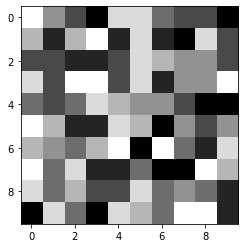

In [ ]:
np.random.seed(144)
f=np.random.randint(0,8,[10,10])
plt.imshow(f,cmap="gray")

<BarContainer object of 8 artists>

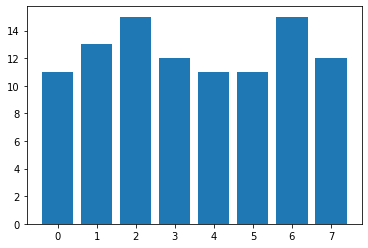

In [ ]:
hist,_=np.histogram(f,bins=8,range=(0,8))
plt.bar(np.arange(0,8),hist)

In [13]:
def thresholding(img,t):
  new_img=np.ones(img.shape).astype(np.uint8)
  new_img[np.where(img<t)]=0
  return new_img

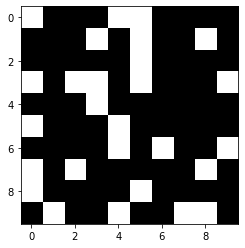

In [ ]:
plt.imshow(thresholding(f,6),cmap="gray")

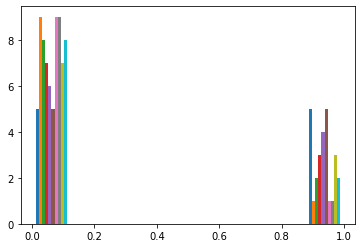

In [ ]:
plt.hist(thresholding(f,6),bins=8)
plt.show()

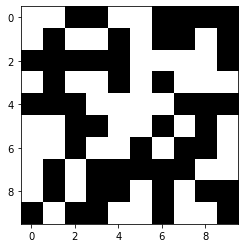

In [ ]:
plt.imshow(thresholding(f,4),cmap="gray")

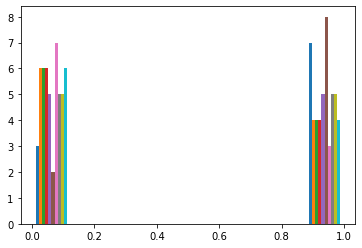

In [ ]:
plt.hist(thresholding(f,4),bins=8)
plt.show()

In [8]:
!wget https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/board.jpg

--2021-10-28 18:10:08--  https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/board.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97621 (95K) [image/jpeg]
Saving to: ‘board.jpg.2’

board.jpg.2         100%[===================>]  95.33K  --.-KB/s    in 0.005s  

2021-10-28 18:10:08 (19.6 MB/s) - ‘board.jpg.2’ saved [97621/97621]



In [9]:
img=imageio.imread('board.jpg.2')

In [18]:
img_t=thresholding(img,np.mean(img))
hist_img,_=np.histogram(img,bins=256,range=(0,256))
hist_t,_=np.histogram(img_t*255,bins=256,range=(0,256))

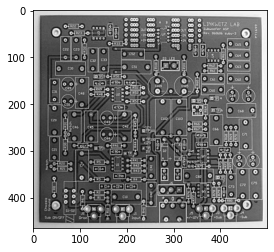

In [22]:
plt.imshow(img,cmap="gray")

<BarContainer object of 256 artists>

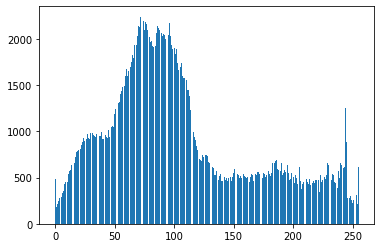

In [19]:
plt.bar(np.arange(0,256),hist_img)

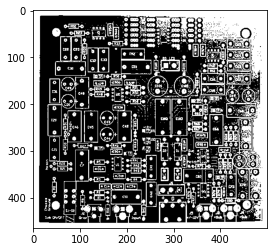

In [23]:
plt.imshow(img_t,cmap="gray")

<BarContainer object of 256 artists>

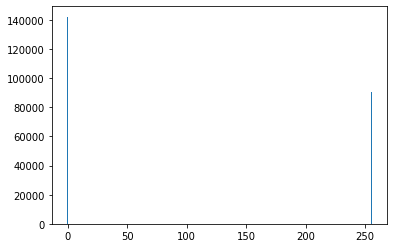

In [20]:
plt.bar(np.arange(0,256),hist_t)

In [27]:
def otsu_threshold(img,max_l):
  m=np.product(img.shape)
  min_var=[]
  hist_t,_=np.histogram(img,bins=256,range=(0,256))

  img_t=thresholding(img,0)

  for l in np.arange(1,max_l):
    img_ti=thresholding(img,l)

    w_a=np.sum(hist_t[:l])/float(m)
    w_b=np.sum(hist_t[l:])/float(m)

    sig_a=np.var(img[np.where(img_ti==0)])
    sig_b=np.var(img[np.where(img_ti==1)])

    min_var=min_var + [w_a*sig_a+w_b*sig_b]
  
  img_t=thresholding(img,np.argmin(min_var))

  return img_t,np.argmin(min_var)

In [34]:
img_o,ol=otsu_threshold(img,133)

In [35]:
hist_o,_=np.histogram(img_o*255,bins=256,range=(0,256))

<BarContainer object of 256 artists>

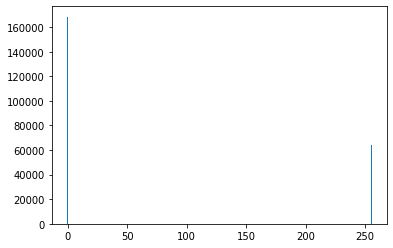

In [36]:
plt.bar(np.arange(0,256),hist_o)

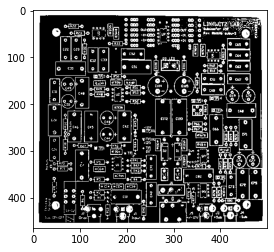

In [37]:
plt.imshow(img_o,cmap="gray")